# Выделение контуров градиентом и лапласианом

<b>1- operator sobel</b>

<table><tr><td>
<table>
<tr>
<td>-1</td><td>-2</td><td>-1</td>
<tr>
<tr>
<td>0</td><td>0</td><td>0</td>
<tr>
<tr>
<td>1</td><td>2</td><td>1</td>
<tr>
</table>
</td><td>
<table>
<tr>
<td>-1</td><td>0</td><td>1</td>
<tr>
<tr>
<td>-2</td><td>0</td><td>2</td>
<tr>
<tr>
<td>-1</td><td>0</td><td>1</td>
<tr>
</table>
</td></tr></table>
<B> 2- Lablasian </B>
<table>
<tr>
<td>-1</td><td>-1</td><td>-1</td>
<tr>
<tr>
<td>-1</td><td> 8</td><td>-1</td>
<tr>
<tr>
<td>-1</td><td>-1</td><td>-1</td>
<tr>
</table>


In [1]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
from matplotlib.pyplot import imshow
from lib.helpersmd import readFromDat
%matplotlib notebook

## 1. Explore Image

<IPython.core.display.Javascript object>


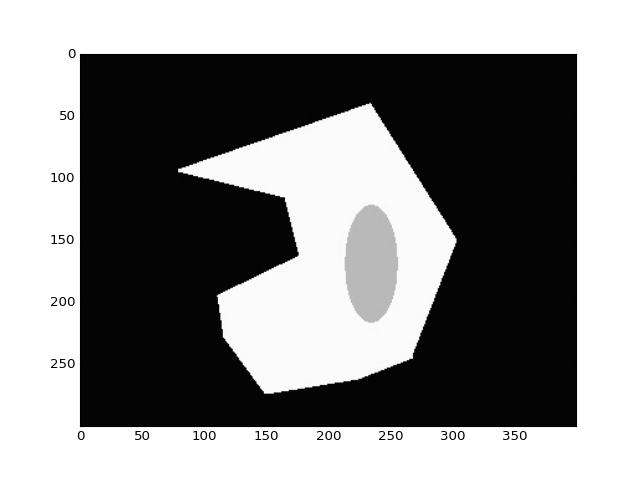

In [2]:
from PIL import Image
model = np.array(Image.open("./data/MODEL.jpg"))
size=model.shape
imshow(model,cmap='gray')

## 2. Threshold Transform

In [3]:
threshimg=np.zeros_like(model)
w=model>200
b=model<200
threshimg[w],threshimg[b]=255,0

In [4]:
# Sobel filters
maskh=np.array([[-1,-2,-1],
                [ 0, 0, 0],
                [ 1, 2, 1]])
maskv=maskh.T
# Lablasian Filters
lablas=np.array([[-1,-1,-1],
                 [-1, 8,-1],
                 [-1,-1,-1]])

## 3. Extract Vertical and Horizontal edges using Sobel

In [5]:
from scipy import ndimage

padded=np.pad(threshimg,(1,1),'constant')
vert=ndimage.convolve(padded,maskv)  #vertical edges
horiz=ndimage.convolve(padded,maskh) #horizontal edges

<IPython.core.display.Javascript object>


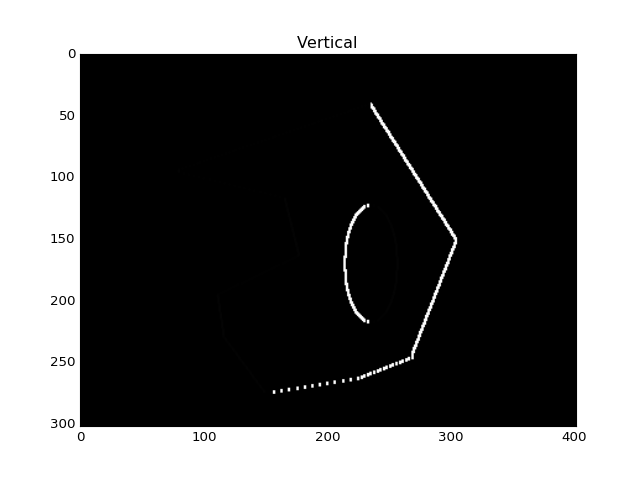

<IPython.core.display.Javascript object>


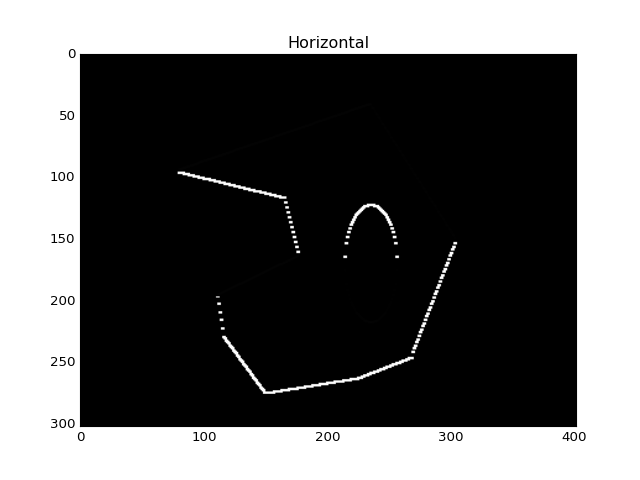

In [6]:
plt.figure()
plt.title('Vertical')
imshow(vert,cmap='gray')

plt.figure()
plt.title('Horizontal')
imshow(horiz,cmap='gray')

## 4. Extract contour using Sobel

In [7]:
lablasian=ndimage.convolve(padded,lablas)

<IPython.core.display.Javascript object>


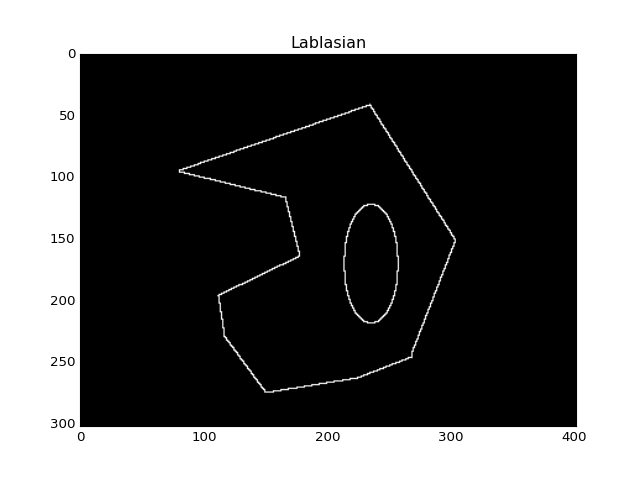

In [8]:
plt.figure()
plt.title('Lablasian')
imshow(lablasian,cmap='gray')